#### 행정구역 정보 읽고, 분석하기
1. read_csv() 함수로 csv file 읽어서 DataFrame 객체생성하기
2. loc 과 iloc를 사용해서 특정행과 열을 선택하기
3. 컬럼명 변경하기
4. 상관관계 분석 (인구수와 면적간의 상관관계)
5. 시각화

In [5]:
import pandas as pd
print(pd.__version__)

data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
print(data.shape)

1.5.3
<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [10]:
data.head()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시
3,3,63986,삼척,11,8,1185.80,강원도,삼척시
4,4,76733,속초,9,1,105.25,강원도,속초시


In [11]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [15]:
data.sample(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
17,17,39668,횡성,10,5,997.82,강원도,횡성군
67,67,251220,경산,11,12,411.58,경상북도,경산시


In [17]:
print(f'컬럼명 : {data.columns}')
print(f'인덱스 : {data.index}')

컬럼명 : Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 : RangeIndex(start=0, stop=229, step=1)


In [19]:
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [23]:
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [26]:
data['인구수'].dtypes

dtype('int64')

In [27]:
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [28]:
# 인구수 1개의 컬럼 선택
print(type(data['인구수']))
data['인구수']

<class 'pandas.core.series.Series'>


0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [29]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max()}")
print(f"인구수 최소값 {data['인구수'].min()}")
print(f"인구수 평균 {data['인구수'].mean()}")
print(f"인구수 표준편차 {data['인구수'].std()}")
print(f"인구수 중간값 {data['인구수'].median()}")
data['인구수'].quantile([0.25, 0.75])

인구수 최대값 1125461
인구수 최소값 8392
인구수 평균 211089.77729257641
인구수 표준편차 207437.8370475227
인구수 중간값 140159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [31]:
max_pop = data['인구수'].max()
data.loc[data['인구수'] == max_pop]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
30,30,1125461,수원,6,9,121.09,경기도,수원시


In [33]:
# unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [34]:
# 광역시도 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [45]:
#경기도에 속한 행정구역,인구수,면적 출력하기
# loc[]
gy_df = data.loc[data['광역시도'] == '경기도',['행정구역','면적','인구수']].sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)
gy_df

,행정구역,면적,인구수
0,수원시,121.090,1125461
1,고양시,267.330,955384
2,용인시,591.500,915005
3,성남시,141.820,911628
4,부천시,53.440,805473
5,안산시,144.780,668089
6,남양주시,458.440,610300
7,안양시,58.520,566558
8,화성시,688.100,555129
9,평택시,452.310,423763


In [46]:
#경기도 인구수의 평균과 표준편차
print(f"경기도 인구수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구수 편차 = {gy_df['인구수'].std()}")

경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876


In [47]:
def pop_mean_std(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name,'인구수':'행정구역']
    print(f"{sido_name} 인구수 평균 = {sido_df['인구수'].mean()}")
    print(f"{sido_name} 인구수 편차 = {sido_df['인구수'].std()}")

In [48]:
pop_mean_std('서울특별시')

서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289


In [49]:
pop_mean_std('부산광역시')

부산광역시 인구수 평균 = 207724.4375
부산광역시 인구수 편차 = 106246.04138380481


In [51]:
for sido_name in data['광역시도'].unique():
    pop_mean_std(sido_name)

강원도 인구수 평균 = 79413.22222222222
강원도 인구수 편차 = 87316.38323837094
경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876
경상남도 인구수 평균 = 174693.72222222222
경상남도 인구수 편차 = 245796.4650767224
경상북도 인구수 평균 = 109085.39130434782
경상북도 인구수 편차 = 124954.74088490057
광주광역시 인구수 평균 = 287641.8
광주광역시 인구수 편차 = 137076.68320578814
대구광역시 인구수 평균 = 297306.25
대구광역시 인구수 편차 = 174375.39437968715
대전광역시 인구수 평균 = 293535.4
대전광역시 인구수 편차 = 111853.57188217103
부산광역시 인구수 평균 = 207724.4375
부산광역시 인구수 편차 = 106246.04138380481
서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289
세종특별자치시 인구수 평균 = 191233.0
세종특별자치시 인구수 편차 = nan
울산광역시 인구수 평균 = 221117.0
울산광역시 인구수 편차 = 64163.28658196991
인천광역시 인구수 평균 = 276657.5
인천광역시 인구수 편차 = 199353.5964908417
전라남도 인구수 평균 = 77298.31818181818
전라남도 인구수 편차 = 74413.25322969875
전라북도 인구수 평균 = 124217.71428571429
전라북도 인구수 편차 = 168327.13482128442
제주특별자치도 인구수 평균 = 287936.5
제주특별자치도 인구수 편차 = 201620.89205362622
충청남도 인구수 평균 = 129741.93333333333
충청남도 인구수 편차 = 141125.1080796583
충청북도 인구수 평균 = 134974.545454545

#### Row, Column Selection
* loc[ ] 과 iloc[ ] 사용하기

In [52]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [53]:
#iloc[] 사용
#인덱스가 20 부터 25까지
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [54]:
#인덱스가 20 부터 25까지 컬럼이 인구수부터 광역시도 까지
data.loc[20:25, '인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도
25,326523,김포,2,3,276.640,경기도


In [55]:
#iloc[] 사용
#인덱스가 20 부터 25까지 컬럼이 인구수부터 광역시도 까지
data.iloc[20:25,1:7]

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도


In [56]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60],['인구수','광역시도','행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [79]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

In [81]:
#열 하나만 선택
print(type(data['면적']))
data['면적'].head()

<class 'pandas.core.series.Series'>


seq
0    1040.07
1     664.19
2     180.01
3    1185.80
4     105.25
Name: 면적, dtype: float64

### DataFrame을 Excel 파일로 저장하기
* 인구수가 전국평균보다 작은 지역의 광역시도,행정구역,인구수를 선택해서 DataFrame를 생성하기
* DataFrame의 to_excel() 함수를 사용해서 Execel로 저장하기

In [60]:
#인구수가 전국평균 보다 작은 지역(인구수,행정구역,광역시도)을 선택해서 결과를 엑셀파일로 저장하기
pop_mean_value=data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value,['광역시도','행정구역','인구수']]\
.sort_values(by=['광역시도','인구수'],ascending=[True,False])\
.reset_index(drop=True)
#excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만지역.xlsx')

211089.77729257641
211090
211089.78


#### 컬럼명 변경
* rename() 함수
  - inplace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과를 출력만 한다.
  - inplace=True 원본 DataFrame객체를 변경하고, 변경한 결과를 출력하지 않는다.

In [69]:
data.columns

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [67]:
data.rename(columns={'Unnamed: 0':'seq'}, inplace=True)

In [75]:
data.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시


In [74]:
#seq컬럼을 index로 변경하기
data.set_index('seq',inplace=True)

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [76]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.3460351605045768

In [77]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.6644268188909778

In [78]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

-0.21572485071590813

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다. 
* Series 객체의 groupby() 함수는 컬럼의 값을 인자로 전달하고, DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달합니다. 

In [86]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [89]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum(numeric_only=True)

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [91]:
#광역시도별 인구수의 합계
data.groupby('광역시도')['인구수'].sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [93]:
#광역시도별 행정구역별 인구수의 합계
group_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
group_df.to_excel('data/광역시도별행정구역별인구수의합계.xlsx', sheet_name='인구수')

#### 엑셀 수치데이터에 콤마찍기
* [ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [95]:
!pip install xlsxwriter

     -------------------------------------- 153.0/153.0 kB 9.5 MB/s eta 0:00:00


In [98]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수 

In [102]:
data.groupby('광역시도')['인구수'].agg(['max','mean','std','min']).fillna(0)

,max,mean,std,min
광역시도,,,,
강원도,313851,79413.222222,87316.383238,20809
경기도,1125461,378845.483871,304548.395142,41076
경상남도,1010040,174693.722222,245796.465077,25091
경상북도,488395,109085.391304,124954.740885,8392
광주광역시,439683,287641.800000,137076.683206,97571
대구광역시,584517,297306.250000,174375.394380,74950
대전광역시,475094,293535.400000,111853.571882,190815
부산광역시,397134,207724.437500,106246.041384,43105
서울특별시,615487,375792.280000,125231.247975,114967


In [103]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False)
group_agg_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
충청북도,790216,134974.545455,223460.356657
제주특별자치도,430504,287936.500000,201620.892054
인천광역시,527153,276657.500000,199353.596491
대구광역시,584517,297306.250000,174375.394380
전라북도,630708,124217.714286,168327.134821
충청남도,584912,129741.933333,141125.108080
광주광역시,439683,287641.800000,137076.683206


In [104]:
# DataFrame 객체의 style 설정
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


In [110]:
group_agg_df

,max,mean,std
광역시도,,,
경기도,1125461,378845.48,304548.40
경상남도,1010040,174693.72,245796.47
충청북도,790216,134974.55,223460.36
제주특별자치도,430504,287936.50,201620.89
인천광역시,527153,276657.50,199353.60
대구광역시,584517,297306.25,174375.39
전라북도,630708,124217.71,168327.13
충청남도,584912,129741.93,141125.11
광주광역시,439683,287641.80,137076.68


In [108]:
# 컬럼의 값을 변경 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)

#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [112]:
%matplotlib inline

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.7.0
seaborn  0.12.2


In [116]:
# 폰트이름과 폰트파일 정보 출력 list comprehension 
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunbd.ttf')]

In [117]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

# matplotlib의 rc(run command) 함수를 사용해서 font name 설정
matplotlib.rc('font', family=font_prop)

Malgun Gothic


#### Figure, Axes, Plot 
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간
  : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* seaborn의 barplot() 함수(막대그래프) 사용 

In [119]:
seoul_df.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구


Figure(1800x1200)
Axes(0.125,0.53;0.775x0.35)
Axes(0.125,0.11;0.775x0.35)


<Axes: xlabel='행정구역', ylabel='면적'>

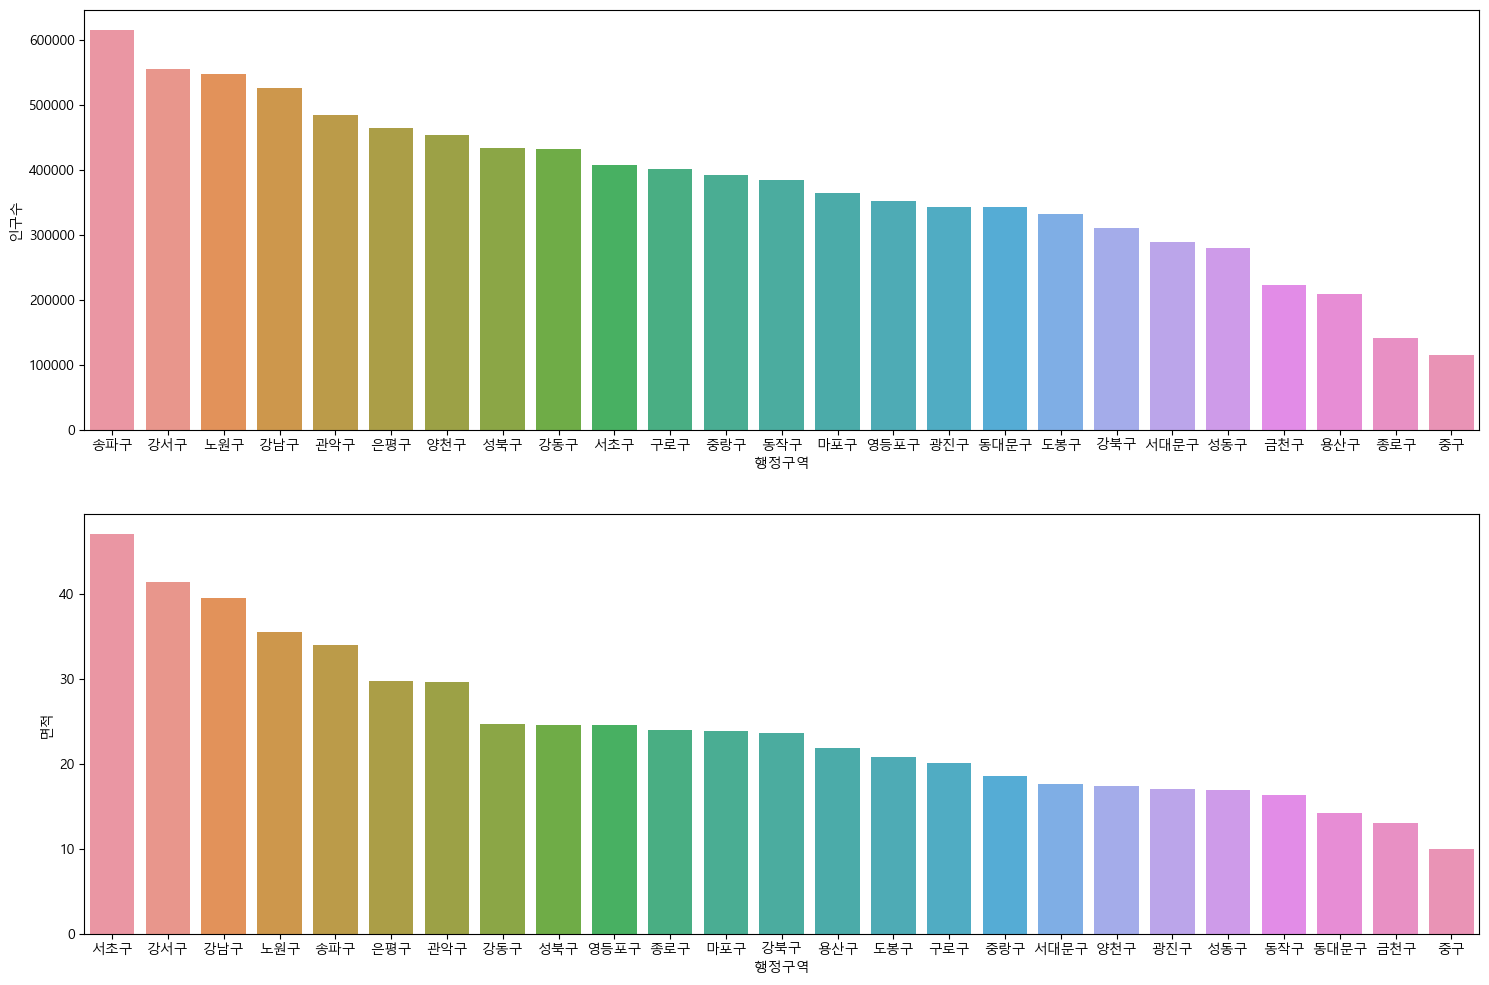

In [128]:
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
sns.barplot(x='행정구역',y='인구수',data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역',y='면적',data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [129]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1)
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2)
    area_plot.set_title(f'{sido_name} 행정구역별 면적')

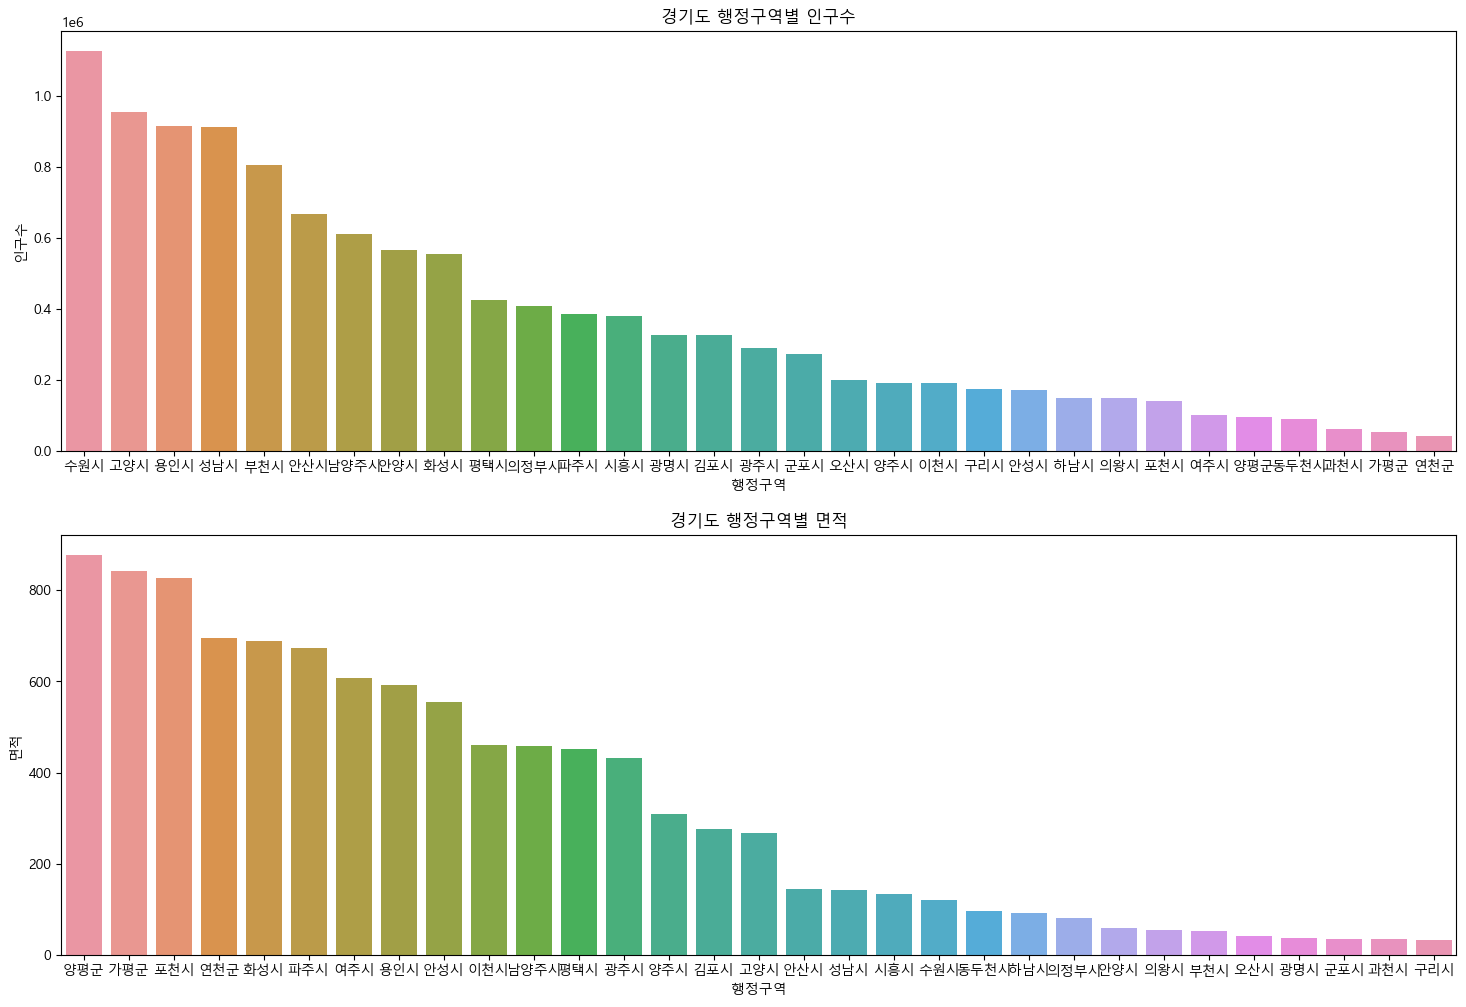

In [130]:
show_pop_area('경기도')

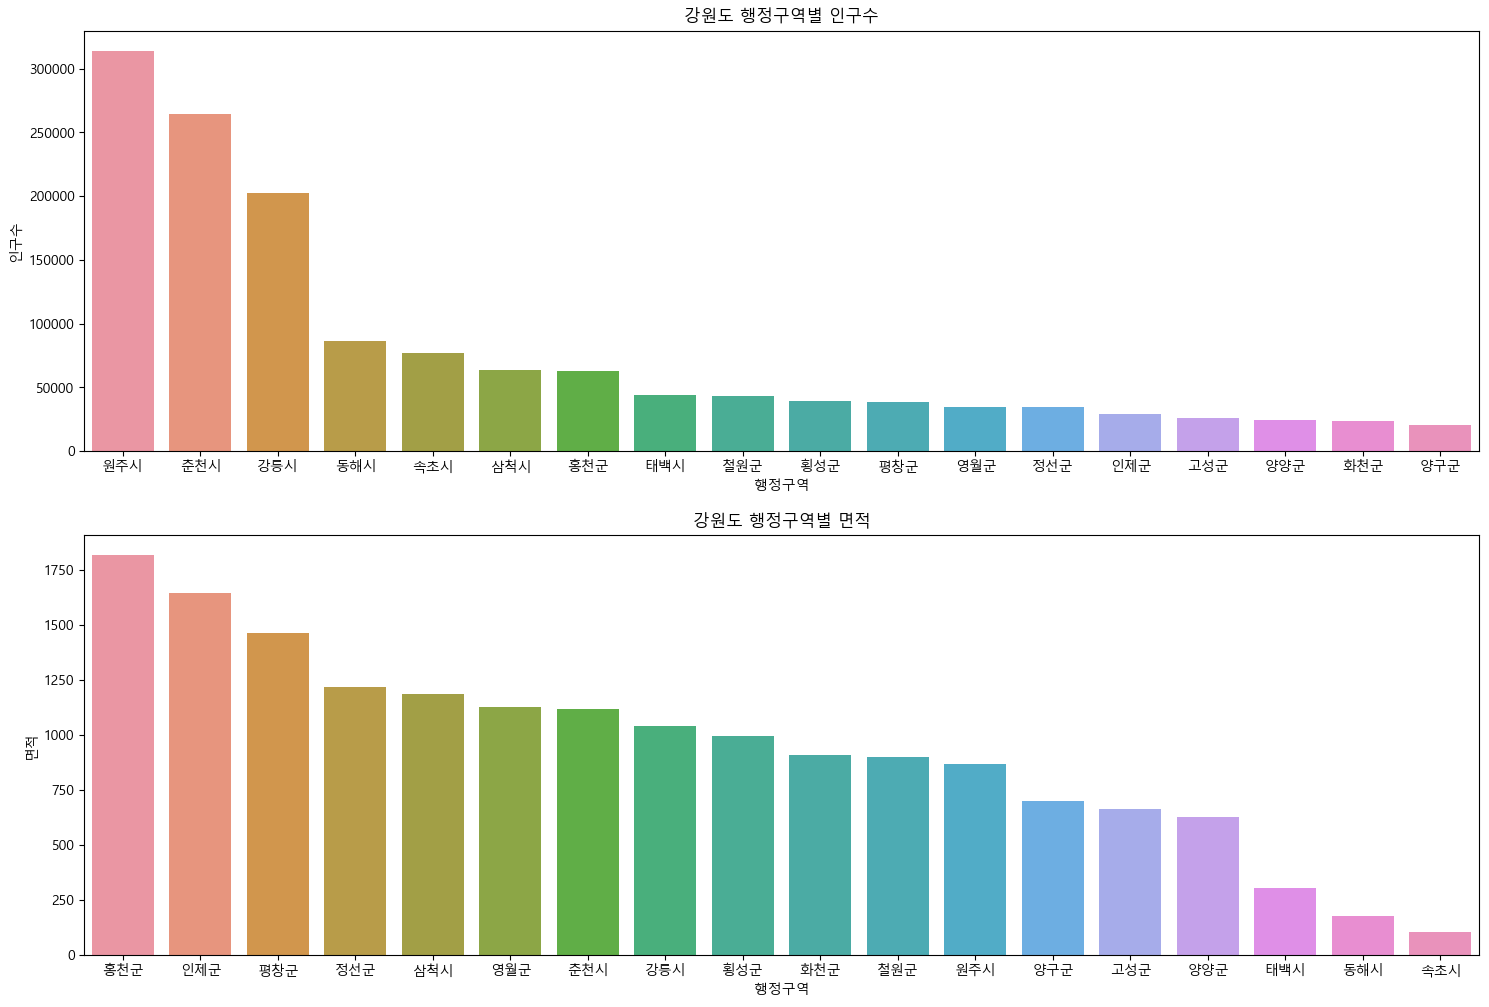

In [132]:
show_pop_area('강원도')

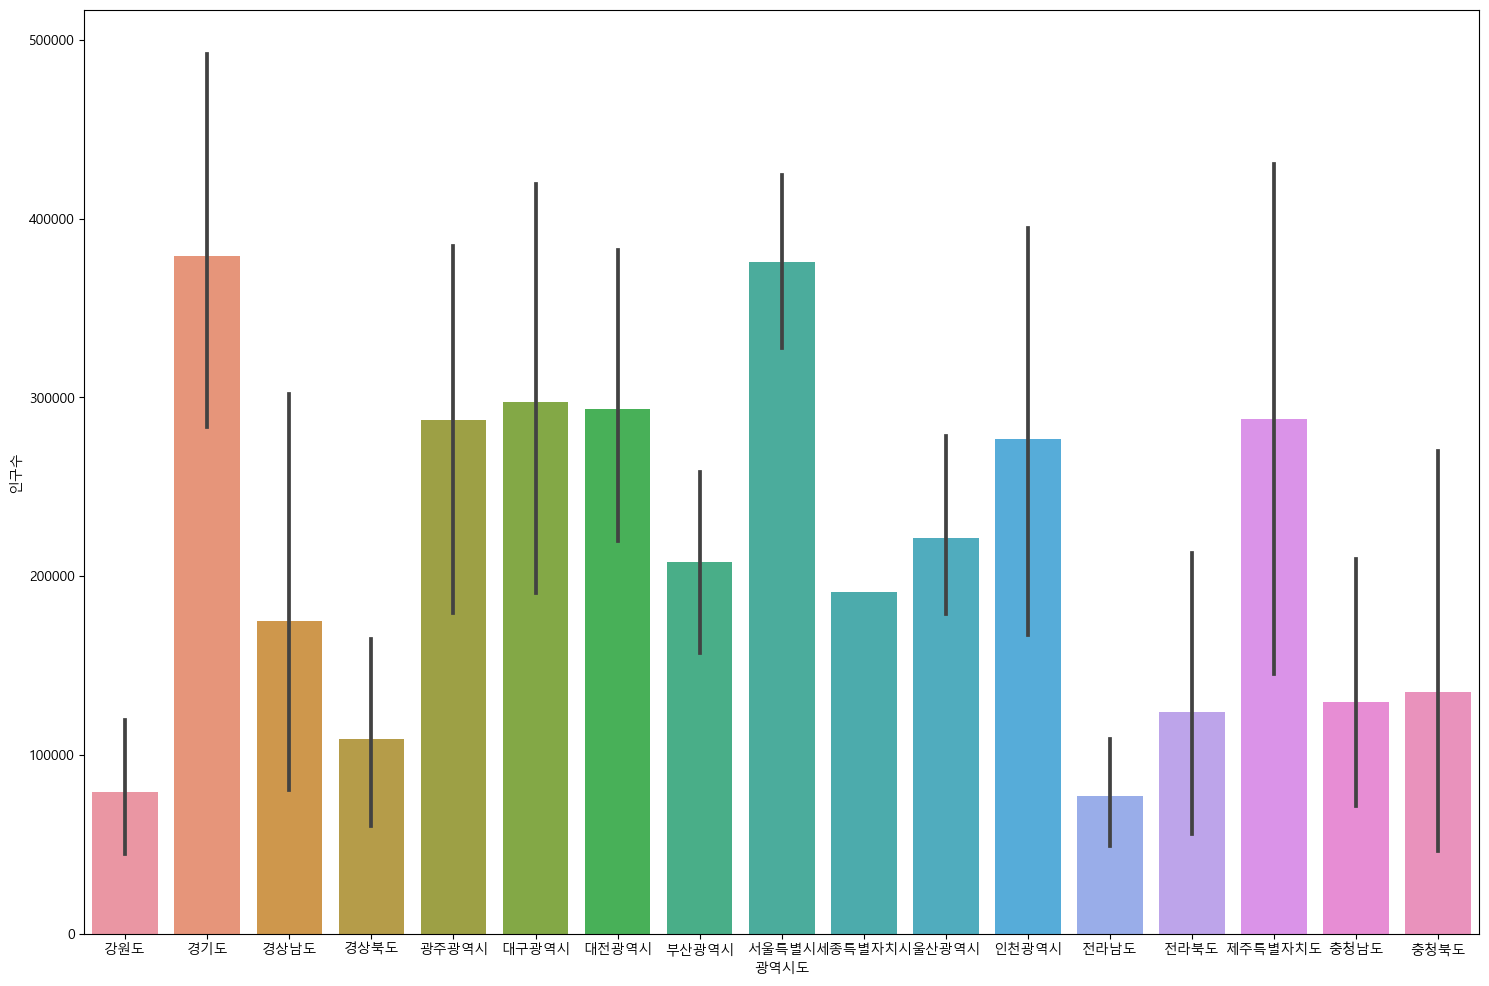

In [135]:
figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axes1)


In [136]:
# 바깥쪽 여백 제거
figure.savefig('data/전국인구수.png', bbox_inches='tight')
figure.savefig('data/전국인구수2.png')
plt.savefig('data/전국인구수3.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [142]:
print(type(seoul_df["인구수"].items()))
seoul_df["인구수"].items()

<class 'zip'>


In [139]:
for i, v in enumerate(seoul_df["인구수"].items()):
    print(i,v[1])

0 526157
1 432028
2 310292
3 554709
4 484478
5 342909
6 401233
7 222566
8 547202
9 331682
10 342429
11 383917
12 364232
13 288543
14 407416
15 279939
16 434061
17 615487
18 453634
19 351837
20 208603
21 464236
22 140595
23 114967
24 391655


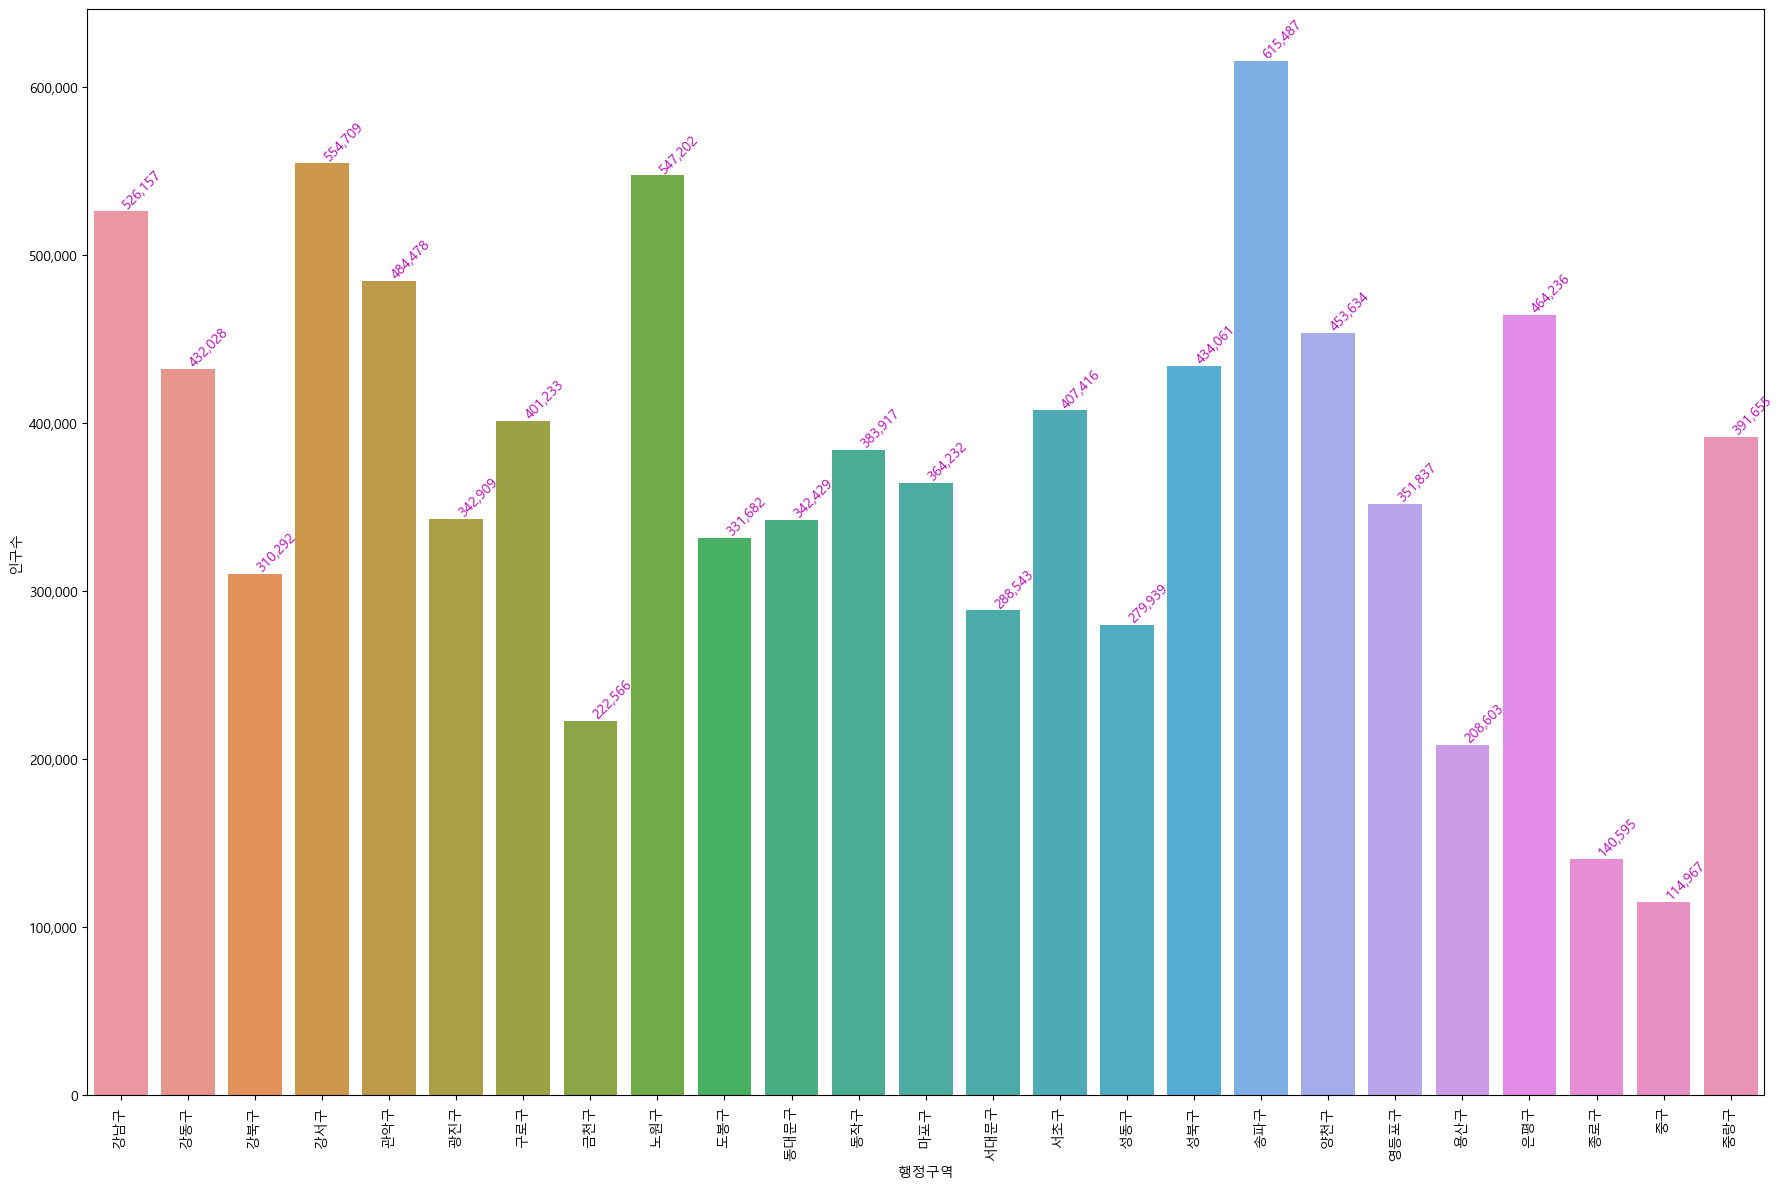

In [146]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1)
#y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#ax1.set(ylabel='인구수')

for item in ax1.get_xticklabels(): 
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].items()):
    ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()